# Argon clean!!

In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import statistics as stats
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from numba import jit
import timeit
%matplotlib inline

import init
from force import Forces
from Forcesg import Forcesg

# General constants

In [25]:
#preferrably unvariable
L = 3 #number of unit cells in 3 directions
Z = 4 #number of atoms per unit cell
N = Z*L**3 #number of atoms in total space


## input parameters , for controlling the phase 
rho = 0.8 #density of particles
T = 0.8

## parameters that are influenced by input parameters
l = (Z/rho)**(1/3) #unit cell length in sigma
ld = L*l #computational domain length







# Constant Energy verification

In [ ]:
r=init.position(l,N,L)
v=init.velocity(T,N)
F,V=Forces(r, ld, N)

Time = 250 #timesteps
dt = 0.004 #length of timestep

#initiate vectors
K=np.zeros(shape=(Time,))
Energy=np.zeros(shape=(Time,))
Ve = np.zeros(shape=(Time, ))

for i in range(Time):
    ## Verlet algorithm
    v += 0.5* F * dt #halfway step for velocity (verlet)
    r += v * dt #update position
    r = np.mod(r , (ld)) #periodic boundary
    F,V = Forces(r,ld,N) #forces due to new position
    v += 0.5 * F * dt #complete velocity step
    v2 = np.multiply(v,v)
    
    #Calculate energies
    K[i] = 0.5*np.sum(v2) #kinetic energy
    Ve[i]=V #potential
    Energy[i]=K[i]+Ve[i] #total

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Energy,label='Total')
ax.plot(Ve,label='Potential')
ax.plot(K,label='Kinetic')
plt.legend(loc=0)
# a = plt.plot(Energy, label='Energy')
# b = plt.plot(Ve, label='Potential Energy')
# c = plt.plot(K, label='Kinetics Energy')
# plt.legend(handles=[a,b,c])



    


# Determination of Averages

Scaling of the velocities for a desired temperature

In [ ]:
Time = 1000 #amount of timesteps for Cv calculation
lt = 200 #amount of timesteps to thermostate

#initiate atoms
r=init.position(l,N,L)
v=init.velocity(T,N)
F,V=Forces(r, ld, N)

#initiate vectors 
K=np.zeros(shape=(Time,))
Energy = np.zeros(shape=(Time,))

for i in range(Time):
    ## Verlet Algorithm
    v += 0.5* F * dt #halfway step for velocity (verlet)
    r += v * dt #update position
    r = np.mod(r , (ld)) #periodic boundary
    F,V = Forces(r,ld,N) #forces due to new position
    v += 0.5 * F * dt #complete velocity step
    
    #Thermostat
    K[i] = 0.5*np.sum( v * v)
    if i<lt and (np.mod(i,1)==0): #mod for calling thermostat 10 times in time lt
        scale=math.sqrt(1.5*(N-1)*T/K[i])
        v=scale*v
        
    #Energy to calculate Cv
    K[i] = 0.5*np.sum( v * v)
    Energy[i] = K[i] + V        
   

 ## Heat Capacity 



In [ ]:
Knew = K[lt:]
#print(Knew)
Kmean = np.mean(Knew)
Kmean2 = Kmean*Kmean
Kvar = np.var(Knew)
Cv = (3*Kmean2)/(2*Kmean2 - 3*N*Kvar) # should be Cv = (3*Kmean2)*N/(2*Kmean2 - 3*N*Kvar)??
print("Cv is", Cv)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Energy,label='Total')
plt.plot(K,label='Kinetic')
plt.legend(loc=0)

# Correlation function

In [26]:
Time = 200 #amount of timesteps for Cv calculation

bins=50
binlen=ld/bins
dt = 0.004 #length of timestep
#initiate atoms
r=init.position(l,N,L)
v=init.velocity(T,N)
F,n=Forcesg(r, ld, N,bins,binlen)


for i in range(Time):
    ## Verlet Algorithm
    v += 0.5* F * dt #halfway step for velocity (verlet)
    r += v * dt #update position
    r = np.mod(r , (ld)) #periodic boundary
    F,nt = Forcesg(r,ld,N,bins,binlen) #forces due to new position
    v += 0.5 * F * dt #complete velocity step
    n+=nt
    
navg=n/Time

for j in range(bins):
    Vshell=4*math.pi*(((j+0.5)*binlen)**2)*binlen
    navg[j]=navg[j]/Vshell
    
corr=2*ld**3/(N*(N-1))*navg


0.1025985568006018


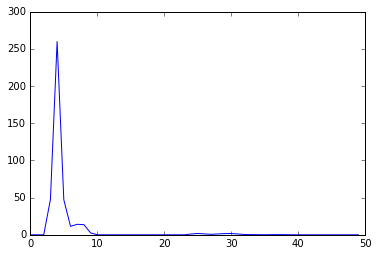

In [27]:


print(binlen)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(corr)